## Imports

In [2]:
import os
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import obspy
from obspy.clients.fdsn.client import Client 
import obspy
import pandas as pd
import scipy.ndimage
import geopy.distance
import random
client = Client('IRIS')
import scipy
import seaborn as sn
from geopy.distance import geodesic

import matplotlib 
#matplotlib.rcParams['font.family']=['Arial']
plt.rcParams.update({'font.size': 14})

## Import Files & Isolate Tremor

In [3]:
# File 1
file_name = 'classifications/J26D_raw.pickle'
with open(file_name, 'rb') as handle:
    j26d_raw = pickle.load(handle)
classification_blocks1 = [block for block in j26d_raw if isinstance(block, list) and len(block) > 0]
j26d_classifications = [record for block in classification_blocks1 for record in block]


# File 2
file_name = 'classifications/J18D_raw.pickle'
with open(file_name, 'rb') as handle:
    j18d_raw = pickle.load(handle)
classification_blocks2 = [block for block in j18d_raw if isinstance(block, list) and len(block) > 0]
j18d_classifications = [record for block in classification_blocks2 for record in block]


# File 3
file_name = 'classifications/J10D_raw.pickle'
with open(file_name, 'rb') as handle:
    j10d_raw = pickle.load(handle)
classification_blocks3 = [block for block in j10d_raw if isinstance(block, list) and len(block) > 0]
j10d_classifications = [record for block in classification_blocks3 for record in block]


# File 4
file_name = 'classifications/G34D_raw.pickle'
with open(file_name, 'rb') as handle:
    g34d_raw = pickle.load(handle)
classification_blocks3 = [block for block in g34d_raw if isinstance(block, list) and len(block) > 0]
g34d_classifications = [record for block in classification_blocks3 for record in block]

# File 5
file_name = 'classifications/G26D_raw.pickle'
with open(file_name, 'rb') as handle:
    g26d_raw = pickle.load(handle)
classification_blocks3 = [block for block in g26d_raw if isinstance(block, list) and len(block) > 0]
g26d_classifications = [record for block in classification_blocks3 for record in block]


# File 6
file_name = 'classifications/FN11C.pickle'
with open(file_name, 'rb') as handle:
    fn11c_raw = pickle.load(handle)
classification_blocks3 = [block for block in fn11c_raw if isinstance(block, list) and len(block) > 0]
fn11c_classifications = [record for block in classification_blocks3 for record in block]
display(fn11c_classifications)

[(2013-09-04T11:53:40.605761Z, 2013-09-04T11:54:10.612272Z),
 'FN11C',
 1,
 0,
 1.307752632927386,
 2.0842451728365125e-10,
 (2013-09-04T12:06:00.766351Z, 2013-09-04T12:16:00.896560Z),
 'FN11C',
 1,
 0,
 3.5787819227020785,
 0.0016836322488270616,
 (2013-09-04T12:18:40.931282Z, 2013-09-04T12:19:30.942133Z),
 'FN11C',
 2,
 1,
 13.725863478713682,
 1.8629249741513637e-07,
 (2013-09-04T12:23:00.987706Z, 2013-09-04T12:24:31.007237Z),
 'FN11C',
 3,
 1,
 42.645292684194295,
 5.390309447372318e-07,
 (2013-09-04T12:29:21.070171Z, 2013-09-04T12:30:21.083192Z),
 'FN11C',
 2,
 0,
 19.874823453846663,
 2.269572729966785e-07,
 (2013-09-04T12:43:31.254633Z, 2013-09-04T12:47:31.306716Z),
 'FN11C',
 2,
 0,
 35.570830468895316,
 2.5342760130474094e-06,
 (2013-09-04T12:50:31.345778Z, 2013-09-04T12:52:51.376160Z),
 'FN11C',
 2,
 0,
 39.249567032493275,
 1.1028670636003366e-06,
 (2013-09-04T12:54:01.391351Z, 2013-09-04T12:55:31.410883Z),
 'FN11C',
 1,
 0,
 78.97345703176867,
 9.764998656225903e-07,
 (2013

In [16]:
# Isolate detections consistent with tremor
threshold = 100
j26d_tremor = [c for c in j26d_classifications if (c[4]>threshold) & (c[2]>1)]

j18d_tremor = [c for c in j18d_classifications if (c[4]>threshold) & (c[2]>1)]

j10d_tremor = [c for c in j10d_classifications if (c[4]>threshold) & (c[2]>1)]

g34d_tremor = [c for c in g34d_classifications if (c[4]>threshold) & (c[2]>1)]

g26d_tremor = [c for c in g34d_classifications if (c[4]>threshold) & (c[2]>1)]

g18d_tremor = [c for c in g34d_classifications if (c[4]>threshold) & (c[2]>1)]

In [17]:
print(len(j26d_tremor))
print(len(j18d_tremor))
print(len(j10d_tremor))
print(len(g34d_tremor))
print(len(g26d_tremor))
print(len(g18d_tremor))

1056
1165
656
135
135
135


## Set Colors

In [20]:
j26d_color='cornflowerblue'
j18d_color='navy'
j10d_color = 'lightgreen'
g34d_color = 'cyan'
g26d_color = 'forestgreen'
g18d_color = 'teal'

## Frequency Ratios for Stations

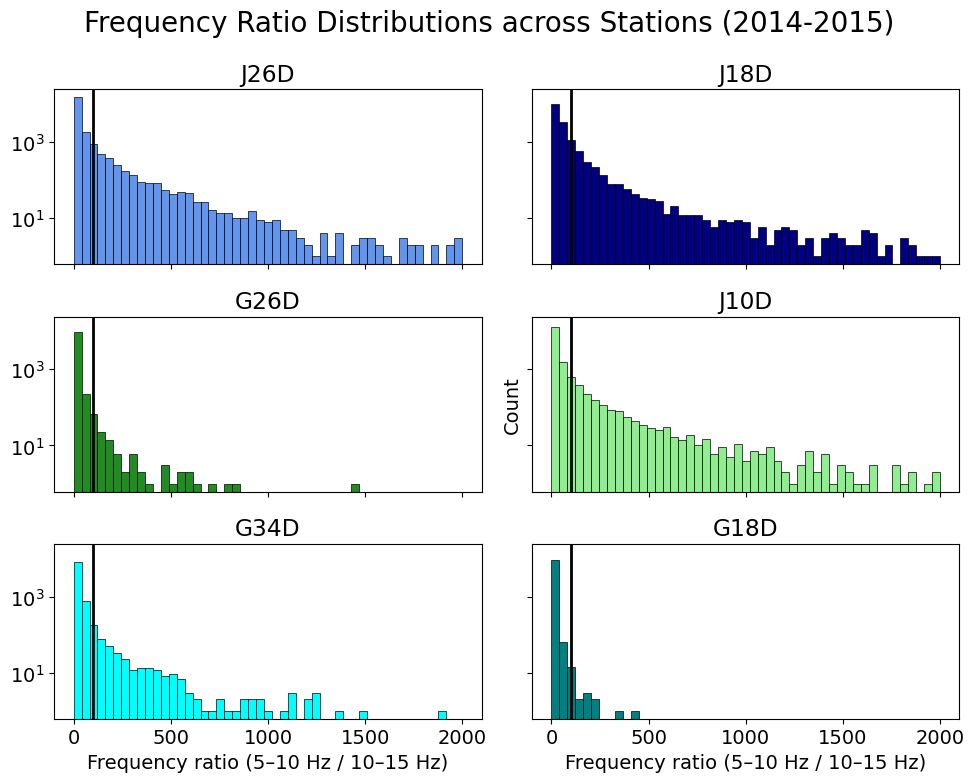

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True, tight_layout=True)

bins = np.linspace(0, 2000, 50)

# Panel [0, 0]: J26D
ax[0, 0].hist([c[4] for c in j26d_classifications],
              bins=bins, color=j26d_color,
              edgecolor='k', linewidth=0.5)
ax[0, 0].axvline(100, color='k', linewidth=2)
ax[0, 0].set_title('J26D')
ax[0, 0].set_yscale('log')

# Panel [0, 1]: J18D
ax[0, 1].hist([c[4] for c in j18d_classifications],
              bins=bins, color=j18d_color,
              edgecolor='k', linewidth=0.5)
ax[0, 1].axvline(100, color='k', linewidth=2)
ax[0, 1].set_title('J18D')
ax[0, 1].set_yscale('log')

# Panel [1, 0]: G26D
ax[1, 0].hist([c[4] for c in g26d_classifications],
              bins=bins, color=g26d_color,
              edgecolor='k', linewidth=0.5)
ax[1, 0].axvline(100, color='k', linewidth=2)
ax[1, 0].set_title('G26D')
ax[1, 0].set_yscale('log')

# Panel [1, 1]: J10D
ax[1, 1].hist([c[4] for c in j10d_classifications],
              bins=bins, color=j10d_color,
              edgecolor='k', linewidth=0.5)
ax[1, 1].axvline(100, color='k', linewidth=2)
ax[1, 1].set_title('J10D')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_yscale('log')

# Panel [2, 0]: G34D
ax[2, 0].hist([c[4] for c in g34d_classifications],
              bins=bins, color=g34d_color,
              edgecolor='k', linewidth=0.5)
ax[2, 0].axvline(100, color='k', linewidth=2)
ax[2, 0].set_title('G34D')
ax[2, 0].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[2, 0].set_yscale('log')

# Panel [2, 1]: G18D
ax[2, 1].hist([c[4] for c in g18d_classifications],
              bins=bins, color=g18d_color,
              edgecolor='k', linewidth=0.5)
ax[2, 1].axvline(100, color='k', linewidth=2)
ax[2, 1].set_title('G18D')
ax[2, 1].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[2, 1].set_yscale('log')

fig.suptitle("Frequency Ratio Distributions across Stations (2014-2015)", fontsize=20)

plt.show()